In [2]:
import numpy as np
import pandas as pd
from visits import Visit, Cohort, MissingDataError, holm_bonferroni
import glob
import pymannkendall as mk
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [3]:
var_results_c1 = pd.read_csv("variance_results_c1.csv", sep=',')
var_results_c2 = pd.read_csv("variance_results_c2_partial.csv", sep=',')
var_results_c2_pt2 = pd.read_csv("variance_results_c2_partial_pt2.csv", sep=',')
var_results_c2_pt3 = pd.read_csv("variance_results_c2_partial_pt3.csv", sep=',')
var_results_c2_pt4 = pd.read_csv("variance_results_c2_partial_pt4.csv", sep=',')
var_results_c2_pt5 = pd.read_csv("variance_results_c2_partial_pt5.csv", sep=',')
# var_results_c2_pt6 = pd.read_csv("variance_results_c2_partial_pt6.csv", sep=',')

In [3]:
var_hr_results_c3_pt2 = pd.read_csv("variance_hr_results_c3_pt2.csv", sep=",")
var_hr_results_c3_pt1 = pd.read_csv("variance_hr_results_c3.csv", sep=",")

In [4]:
var_hr_results_c3_entire = pd.concat([var_hr_results_c3_pt1, var_hr_results_c3_pt2])

In [5]:
var_hr_results_c3_entire.to_csv("variance_hr_results_c3_entire.csv")

# Variance: Heart Rate (cohort 2 only goes up to 1970th index)

In [3]:
var_results_c2_entire = pd.concat([var_results_c2,var_results_c2_pt2,var_results_c2_pt3,var_results_c2_pt4,var_results_c2_pt5])
# var_results_c2.merge(var_results_c2_pt3,how ='left').merge(var_results_c2_pt4,how ='left').merge(var_results_c2_pt5,how ='left').merge(var_results_c2_pt6,how ='left')

In [14]:
var_results_c2_entire.to_csv("variance_results_c2_entire.csv")

(array([0.09700243, 0.19400487, 0.33950852, 0.48501217, 0.97002435,
        1.35803408, 0.77601948, 0.77601948, 0.2910073 , 0.14550365]),
 array([-0.9254902 , -0.74140056, -0.55731092, -0.37322129, -0.18913165,
        -0.00504202,  0.17904762,  0.36313725,  0.54722689,  0.73131653,
         0.91540616]),
 <BarContainer object of 10 artists>)

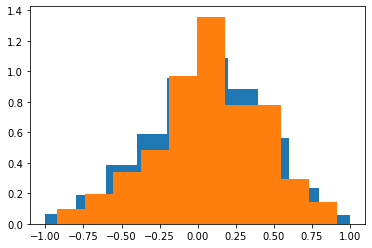

In [23]:
plt.hist(var_results_c2_entire["tau"], density=True)
plt.hist(var_results_c1["tau"], density=True)

In [19]:
np.sqrt(var_results_c1["tau"].var())

0.36298960604264624

In [5]:
var_results_c2_entire

,Unnamed: 0,Project ID,visit_no,trend,p-value,tau
0,0,RR0519,1,no trend,5.341217e-01,0.086586
1,1,RU2915,1,increasing,1.394440e-13,0.754386
2,2,RU0683,1,increasing,2.327383e-04,0.322680
3,3,RU2270,1,no trend,3.317809e-01,0.119894
4,4,RI0135,1,decreasing,4.026488e-02,-0.388838
...,...,...,...,...,...,...
14,14,XH3443,4,decreasing,3.586244e-07,-0.437166
15,15,EN3335,4,no trend,8.270270e-02,0.385253
16,16,EB2223,4,increasing,1.329003e-02,0.200274
17,17,EB2133,4,no trend,5.052912e-02,0.298389


In [7]:
c1_failed = holm_bonferroni(var_results_c1["Project ID"], var_results_c1["visit_no"], var_results_c1["p-value"], var_results_c1["trend"])

Test 2 of 112 failed: (0.000000,decreasing)
Test 5 of 112 failed: (0.000000,decreasing)
Test 6 of 112 failed: (0.000000,decreasing)
Test 11 of 112 failed: (0.000001,decreasing)
Test 15 of 112 failed: (0.000005,decreasing)
Test 16 of 112 failed: (0.000019,decreasing)
Test 19 of 112 failed: (0.000053,decreasing)
Test 22 of 112 failed: (0.000111,decreasing)
Test 23 of 112 failed: (0.000151,decreasing)
Test 31 of 112 failed: (0.000810,increasing)
Test 32 of 112 failed: (0.001065,increasing)
Test 33 of 112 failed: (0.001077,increasing)
Test 34 of 112 failed: (0.001150,increasing)
Test 35 of 112 failed: (0.001840,increasing)
Test 36 of 112 failed: (0.002123,decreasing)
Test 37 of 112 failed: (0.002288,increasing)
Test 38 of 112 failed: (0.002738,increasing)
Test 39 of 112 failed: (0.003392,increasing)
Test 40 of 112 failed: (0.003873,decreasing)
Test 41 of 112 failed: (0.004559,decreasing)
Test 42 of 112 failed: (0.004701,decreasing)
Test 43 of 112 failed: (0.005899,increasing)
Test 44 of 11

In [8]:
c1_failed = pd.DataFrame(c1_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])

In [9]:
c1_failed

,Index,Project ID,visit_no,p-value,trend
0,2,FN3246,1,0.000000,decreasing
1,5,IZ1435,1,0.000000,decreasing
2,6,SZ0162,1,0.000000,decreasing
3,11,LG2586,1,0.000001,decreasing
4,15,YY0580,2,0.000005,decreasing
...,...,...,...,...,...
86,108,YV1012,1,0.966680,no trend
87,109,RZ3023,2,0.967199,no trend
88,110,ST0725,5,0.967761,no trend
89,111,OL2236,1,0.972174,no trend


In [10]:
c1_failed.to_csv("variance_failed_tests_c1.csv")

In [11]:
c2_failed_entire = holm_bonferroni(var_results_c2_entire["Project ID"], var_results_c2_entire["visit_no"], var_results_c2_entire["p-value"], var_results_c2_entire["trend"])

Test 1 of 1918 failed: (0.000000,decreasing)
Test 4 of 1918 failed: (0.000000,decreasing)
Test 6 of 1918 failed: (0.000000,decreasing)
Test 10 of 1918 failed: (0.000000,decreasing)
Test 12 of 1918 failed: (0.000000,decreasing)
Test 13 of 1918 failed: (0.000000,decreasing)
Test 14 of 1918 failed: (0.000000,decreasing)
Test 17 of 1918 failed: (0.000000,decreasing)
Test 18 of 1918 failed: (0.000000,decreasing)
Test 22 of 1918 failed: (0.000000,decreasing)
Test 31 of 1918 failed: (0.000000,decreasing)
Test 35 of 1918 failed: (0.000000,decreasing)
Test 37 of 1918 failed: (0.000000,decreasing)
Test 42 of 1918 failed: (0.000000,decreasing)
Test 43 of 1918 failed: (0.000000,decreasing)
Test 46 of 1918 failed: (0.000000,decreasing)
Test 48 of 1918 failed: (0.000000,decreasing)
Test 51 of 1918 failed: (0.000000,decreasing)
Test 53 of 1918 failed: (0.000000,decreasing)
Test 57 of 1918 failed: (0.000000,decreasing)
Test 60 of 1918 failed: (0.000000,decreasing)
Test 66 of 1918 failed: (0.000000,dec

In [12]:
c2_failed_entire = pd.DataFrame(c2_failed_entire, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])

In [13]:
c2_failed_entire

,Index,Project ID,visit_no,p-value,trend
0,1,KZ0874,4,0.000000,decreasing
1,4,FM2410,1,0.000000,decreasing
2,6,IJ0775,1,0.000000,decreasing
3,10,KV1281,1,0.000000,decreasing
4,12,AL3883,1,0.000000,decreasing
...,...,...,...,...,...
1774,1914,LA1735,1,0.988744,no trend
1775,1915,XI0248,1,0.991827,no trend
1776,1916,IP3568,2,0.994333,no trend
1777,1917,RX1003,1,0.995316,no trend


In [76]:
c2_failed_entire.to_csv("variance_failed_tests_c2.csv")

In [9]:
c2_failed = holm_bonferroni(var_results_c2["p-value"], var_results_c2["trend"])

Test 39 of 193 failed: (0.000349,increasing)
Test 40 of 193 failed: (0.000375,decreasing)
Test 41 of 193 failed: (0.000410,decreasing)
Test 42 of 193 failed: (0.000419,increasing)
Test 43 of 193 failed: (0.000696,increasing)
Test 44 of 193 failed: (0.000799,increasing)
Test 45 of 193 failed: (0.000853,increasing)
Test 46 of 193 failed: (0.000921,increasing)
Test 47 of 193 failed: (0.001058,increasing)
Test 48 of 193 failed: (0.001223,increasing)
Test 49 of 193 failed: (0.001321,decreasing)
Test 50 of 193 failed: (0.001674,decreasing)
Test 51 of 193 failed: (0.002190,increasing)
Test 52 of 193 failed: (0.002583,increasing)
Test 53 of 193 failed: (0.002992,increasing)
Test 54 of 193 failed: (0.003201,decreasing)
Test 55 of 193 failed: (0.003432,increasing)
Test 56 of 193 failed: (0.003810,decreasing)
Test 57 of 193 failed: (0.003863,increasing)
Test 58 of 193 failed: (0.004267,increasing)
Test 59 of 193 failed: (0.004292,increasing)
Test 60 of 193 failed: (0.004418,increasing)
Test 61 of

In [26]:
c2_partial_failed = holm_bonferroni(var_results_c2["Project ID"], var_results_c2["visit_no"], var_results_c2["p-value"], var_results_c2["trend"])

Test 119 of 970 failed: (0.000060,decreasing)
Test 120 of 970 failed: (0.000062,increasing)
Test 121 of 970 failed: (0.000064,increasing)
Test 122 of 970 failed: (0.000067,decreasing)
Test 123 of 970 failed: (0.000068,increasing)
Test 124 of 970 failed: (0.000076,increasing)
Test 125 of 970 failed: (0.000081,increasing)
Test 126 of 970 failed: (0.000086,decreasing)
Test 127 of 970 failed: (0.000088,increasing)
Test 128 of 970 failed: (0.000096,decreasing)
Test 129 of 970 failed: (0.000097,increasing)
Test 130 of 970 failed: (0.000098,increasing)
Test 131 of 970 failed: (0.000098,increasing)
Test 132 of 970 failed: (0.000100,decreasing)
Test 133 of 970 failed: (0.000116,decreasing)
Test 134 of 970 failed: (0.000120,increasing)
Test 135 of 970 failed: (0.000128,decreasing)
Test 136 of 970 failed: (0.000139,decreasing)
Test 137 of 970 failed: (0.000139,decreasing)
Test 138 of 970 failed: (0.000144,increasing)
Test 139 of 970 failed: (0.000161,increasing)
Test 140 of 970 failed: (0.000178,

In [27]:
c2_partial_failed = pd.DataFrame(c2_partial_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])

In [34]:
c2_partial_failed.to_csv("variance_failed_tests_c2_partial.csv")

In [30]:
c2_partial_failed_pt2 = holm_bonferroni(var_results_c2_pt2["Project ID"], var_results_c2_pt2["visit_no"], var_results_c2_pt2["p-value"], var_results_c2_pt2["trend"])

Test 122 of 782 failed: (0.000076,decreasing)
Test 123 of 782 failed: (0.000077,decreasing)
Test 124 of 782 failed: (0.000078,decreasing)
Test 125 of 782 failed: (0.000080,increasing)
Test 126 of 782 failed: (0.000080,decreasing)
Test 127 of 782 failed: (0.000083,increasing)
Test 128 of 782 failed: (0.000095,increasing)
Test 129 of 782 failed: (0.000096,increasing)
Test 130 of 782 failed: (0.000101,decreasing)
Test 131 of 782 failed: (0.000117,increasing)
Test 132 of 782 failed: (0.000120,increasing)
Test 133 of 782 failed: (0.000123,increasing)
Test 134 of 782 failed: (0.000124,increasing)
Test 135 of 782 failed: (0.000124,increasing)
Test 136 of 782 failed: (0.000134,decreasing)
Test 137 of 782 failed: (0.000147,increasing)
Test 138 of 782 failed: (0.000158,increasing)
Test 139 of 782 failed: (0.000160,increasing)
Test 140 of 782 failed: (0.000168,increasing)
Test 141 of 782 failed: (0.000169,decreasing)
Test 142 of 782 failed: (0.000170,increasing)
Test 143 of 782 failed: (0.000175,

In [32]:
c2_partial_failed_pt2 = pd.DataFrame(c2_partial_failed_pt2, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])

In [36]:
c2_partial_failed_pt2.to_csv("variance_failed_tests_c2_partial_pt2.csv")

In [ ]:
c2_partial_failed_pt3 = holm_bonferroni(var_results_c2_pt3["Project ID"], var_results_c2_pt3["visit_no"], var_results_c2_pt3["p-value"], var_results_c2_pt3["trend"])

In [8]:
c3_hr_failed = holm_bonferroni(var_hr_results_c3_entire["Project ID"], var_hr_results_c3_entire["visit_no"], var_hr_results_c3_entire["p-value"], var_hr_results_c3_entire["trend"])
c3_hr_failed = pd.DataFrame(c3_hr_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c3_hr_failed.to_csv("variance_hr_failed_tests_c3.csv")

Test 2 of 115 failed: (0.000000,decreasing)
Test 4 of 115 failed: (0.000000,decreasing)
Test 7 of 115 failed: (0.000000,decreasing)
Test 8 of 115 failed: (0.000000,decreasing)
Test 10 of 115 failed: (0.000000,decreasing)
Test 17 of 115 failed: (0.000001,decreasing)
Test 18 of 115 failed: (0.000002,decreasing)
Test 19 of 115 failed: (0.000002,decreasing)
Test 20 of 115 failed: (0.000004,decreasing)
Test 21 of 115 failed: (0.000014,decreasing)
Test 22 of 115 failed: (0.000035,decreasing)
Test 24 of 115 failed: (0.000047,decreasing)
Test 25 of 115 failed: (0.000048,decreasing)
Test 27 of 115 failed: (0.000084,decreasing)
Test 29 of 115 failed: (0.000105,decreasing)
Test 30 of 115 failed: (0.000138,decreasing)
Test 32 of 115 failed: (0.000239,decreasing)
Test 33 of 115 failed: (0.000362,decreasing)
Test 35 of 115 failed: (0.000553,decreasing)
Test 36 of 115 failed: (0.000568,decreasing)
Test 37 of 115 failed: (0.000908,decreasing)
Test 38 of 115 failed: (0.001060,increasing)
Test 39 of 115

In [11]:
var_abf_results_c3 = pd.read_csv('variance_abf_results_c3.csv', sep=',')
c3_abf_failed = holm_bonferroni(var_abf_results_c3["Project ID"], var_abf_results_c3["visit_no"], var_abf_results_c3["p-value"], var_abf_results_c3["trend"])
c3_abf_failed = pd.DataFrame(c3_abf_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c3_abf_failed.to_csv("variance_abf_failed_tests_c3.csv")
c3_abf_failed

Test 2 of 68 failed: (0.000000,decreasing)
Test 7 of 68 failed: (0.000019,decreasing)
Test 13 of 68 failed: (0.000335,decreasing)
Test 15 of 68 failed: (0.003542,increasing)
Test 16 of 68 failed: (0.005051,increasing)
Test 17 of 68 failed: (0.005208,decreasing)
Test 18 of 68 failed: (0.006502,decreasing)
Test 19 of 68 failed: (0.007847,decreasing)
Test 20 of 68 failed: (0.014602,decreasing)
Test 21 of 68 failed: (0.015242,decreasing)
Test 22 of 68 failed: (0.016823,decreasing)
Test 23 of 68 failed: (0.017287,increasing)
Test 24 of 68 failed: (0.018097,increasing)
Test 25 of 68 failed: (0.027598,decreasing)
Test 26 of 68 failed: (0.030410,decreasing)
Test 27 of 68 failed: (0.033541,increasing)
Test 28 of 68 failed: (0.039120,decreasing)
Test 29 of 68 failed: (0.043104,decreasing)
Test 30 of 68 failed: (0.058453,no trend)
Test 31 of 68 failed: (0.072571,no trend)
Test 32 of 68 failed: (0.079947,no trend)
Test 33 of 68 failed: (0.084894,no trend)
Test 34 of 68 failed: (0.093909,no trend)


,Index,Project ID,visit_no,p-value,trend
0,2,CE1410,1,0.000000,decreasing
1,7,XV1539,5,0.000019,decreasing
2,13,XL3477,1,0.000335,decreasing
3,15,WB0703,1,0.003542,increasing
4,16,RK1399,3,0.005051,increasing
5,17,NR0439,1,0.005208,decreasing
6,18,US0688,1,0.006502,decreasing
7,19,VY1044,3,0.007847,decreasing
8,20,IG2110,1,0.014602,decreasing
9,21,XZ2583,2,0.015242,decreasing


# Variance: Respiration Rate

In [35]:
var_rr_results_c1 = pd.read_csv("variance_rr_results_c1.csv", sep=',')
var_rr_results_c2_partial = pd.read_csv("variance_rr_results_c2_pt1.csv", sep=',')

In [36]:
c1_rr_failed = holm_bonferroni(var_rr_results_c1["Project ID"], var_rr_results_c1["visit_no"], var_rr_results_c1["p-value"], var_rr_results_c1["trend"])

Test 3 of 100 failed: (0.000000,decreasing)
Test 6 of 100 failed: (0.000000,decreasing)
Test 7 of 100 failed: (0.000000,decreasing)
Test 8 of 100 failed: (0.000002,decreasing)
Test 13 of 100 failed: (0.000024,decreasing)
Test 17 of 100 failed: (0.000157,decreasing)
Test 19 of 100 failed: (0.000191,decreasing)
Test 20 of 100 failed: (0.000263,decreasing)
Test 24 of 100 failed: (0.000663,increasing)
Test 25 of 100 failed: (0.001395,increasing)
Test 26 of 100 failed: (0.001446,increasing)
Test 27 of 100 failed: (0.001481,decreasing)
Test 28 of 100 failed: (0.001729,decreasing)
Test 29 of 100 failed: (0.002090,increasing)
Test 30 of 100 failed: (0.002245,increasing)
Test 31 of 100 failed: (0.002385,decreasing)
Test 32 of 100 failed: (0.003068,decreasing)
Test 33 of 100 failed: (0.003228,decreasing)
Test 34 of 100 failed: (0.004118,decreasing)
Test 35 of 100 failed: (0.004452,decreasing)
Test 36 of 100 failed: (0.005713,increasing)
Test 37 of 100 failed: (0.006098,increasing)
Test 38 of 100

In [37]:
c1_rr_failed = pd.DataFrame(c1_rr_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c1_rr_failed

,Index,Project ID,visit_no,p-value,trend
0,3,YC1602,1,0.000000,decreasing
1,6,UB1799,1,0.000000,decreasing
2,7,GF1065,1,0.000000,decreasing
3,8,NF3544,1,0.000002,decreasing
4,13,WM2916,3,0.000024,decreasing
...,...,...,...,...,...
80,96,WF2826,1,0.979599,no trend
81,97,TP3224,1,0.983912,no trend
82,98,ST0725,5,0.993714,no trend
83,99,ZK0529,1,1.000000,no trend


In [69]:
c1_rr_failed.to_csv("variance_rr_failed_tests_c1.csv")

In [30]:
c2_rr_failed = holm_bonferroni(var_rr_results_c2_partial["Project ID"], var_rr_results_c2_partial["visit_no"], var_rr_results_c2_partial["p-value"], var_rr_results_c2_partial["trend"])

Test 1 of 1639 failed: (0.000000,decreasing)
Test 2 of 1639 failed: (0.000000,decreasing)
Test 7 of 1639 failed: (0.000000,decreasing)
Test 13 of 1639 failed: (0.000000,decreasing)
Test 22 of 1639 failed: (0.000000,decreasing)
Test 25 of 1639 failed: (0.000000,decreasing)
Test 26 of 1639 failed: (0.000000,decreasing)
Test 33 of 1639 failed: (0.000000,decreasing)
Test 35 of 1639 failed: (0.000000,decreasing)
Test 36 of 1639 failed: (0.000000,decreasing)
Test 41 of 1639 failed: (0.000000,decreasing)
Test 45 of 1639 failed: (0.000000,decreasing)
Test 47 of 1639 failed: (0.000000,decreasing)
Test 50 of 1639 failed: (0.000000,decreasing)
Test 53 of 1639 failed: (0.000000,decreasing)
Test 54 of 1639 failed: (0.000000,decreasing)
Test 55 of 1639 failed: (0.000000,decreasing)
Test 57 of 1639 failed: (0.000000,decreasing)
Test 60 of 1639 failed: (0.000000,decreasing)
Test 63 of 1639 failed: (0.000000,decreasing)
Test 67 of 1639 failed: (0.000000,decreasing)
Test 69 of 1639 failed: (0.000000,dec

In [31]:
c2_rr_failed = pd.DataFrame(c2_rr_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])

In [32]:
c2_rr_failed

,Index,Project ID,visit_no,p-value,trend
0,1,LZ2525,1,0.000000,decreasing
1,2,DF3742,2,0.000000,decreasing
2,7,CM3898,1,0.000000,decreasing
3,13,IB3702,1,0.000000,decreasing
4,22,IP3497,1,0.000000,decreasing
...,...,...,...,...,...
1479,1635,RB0988,1,1.000000,no trend
1480,1636,FQ1610,1,1.000000,no trend
1481,1637,MN0390,1,1.000000,no trend
1482,1638,WQ0872,1,1.000000,no trend


In [33]:
c2_rr_failed.to_csv("variance_rr_failed_tests_c2.csv")

In [15]:
ac_abf_results_c3 = pd.read_csv('autocorrelation_abf_results_c3.csv', sep=',')
c3_failed = holm_bonferroni(ac_abf_results_c3["Project ID"], ac_abf_results_c3["visit_no"], ac_abf_results_c3["p-value"], ac_abf_results_c3["trend"])
c3_failed = pd.DataFrame(c3_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c3_failed.to_csv("autocorrelation_abf_failed_tests_c3.csv")
c3_failed

Test 2 of 67 failed: (0.000000,decreasing)
Test 3 of 67 failed: (0.000000,decreasing)
Test 4 of 67 failed: (0.000001,decreasing)
Test 8 of 67 failed: (0.000184,decreasing)
Test 10 of 67 failed: (0.000366,decreasing)
Test 12 of 67 failed: (0.001265,increasing)
Test 13 of 67 failed: (0.001761,increasing)
Test 14 of 67 failed: (0.002532,increasing)
Test 15 of 67 failed: (0.002814,increasing)
Test 16 of 67 failed: (0.004131,increasing)
Test 17 of 67 failed: (0.006195,decreasing)
Test 18 of 67 failed: (0.008171,increasing)
Test 19 of 67 failed: (0.009516,decreasing)
Test 20 of 67 failed: (0.009517,increasing)
Test 21 of 67 failed: (0.009733,decreasing)
Test 22 of 67 failed: (0.010704,decreasing)
Test 23 of 67 failed: (0.016015,decreasing)
Test 24 of 67 failed: (0.017372,increasing)
Test 25 of 67 failed: (0.023767,decreasing)
Test 26 of 67 failed: (0.026482,decreasing)
Test 27 of 67 failed: (0.026634,decreasing)
Test 28 of 67 failed: (0.026849,increasing)
Test 29 of 67 failed: (0.029436,decr

,Index,Project ID,visit_no,p-value,trend
0,2,OZ1875,1.0,0.000000,decreasing
1,3,GK3908,1.0,0.000000,decreasing
2,4,KA2891,1.0,0.000001,decreasing
3,8,TL1776,1.0,0.000184,decreasing
4,10,XL3477,1.0,0.000366,decreasing
...,...,...,...,...,...
56,63,DN0147,1.0,0.624654,no trend
57,64,DR1024,1.0,0.691858,no trend
58,65,XT0533,1.0,0.876187,no trend
59,66,IE3963,1.0,0.885568,no trend


# Autocorrelation: HR

In [5]:
ac_hr_results_c1 = pd.read_csv('autocorrelation_hr_results_c1.csv', sep=',')
ac_hr_results_c2_partial = pd.read_csv('autocorrelation_hr_results_c2_partial.csv', sep=',')


In [25]:
ac_hr_failed_c1 = holm_bonferroni(ac_hr_results_c1["Project ID"], ac_hr_results_c1["visit_no"], ac_hr_results_c1["p-value"], ac_hr_results_c1["trend"])

Test 2 of 112 failed: (0.000000,decreasing)
Test 7 of 112 failed: (0.000000,decreasing)
Test 8 of 112 failed: (0.000000,decreasing)
Test 11 of 112 failed: (0.000002,decreasing)
Test 14 of 112 failed: (0.000014,decreasing)
Test 18 of 112 failed: (0.000048,decreasing)
Test 19 of 112 failed: (0.000112,decreasing)
Test 22 of 112 failed: (0.000189,decreasing)
Test 24 of 112 failed: (0.000308,decreasing)
Test 26 of 112 failed: (0.000878,increasing)
Test 27 of 112 failed: (0.000913,increasing)
Test 28 of 112 failed: (0.001276,increasing)
Test 29 of 112 failed: (0.001384,increasing)
Test 30 of 112 failed: (0.002206,increasing)
Test 31 of 112 failed: (0.002648,decreasing)
Test 32 of 112 failed: (0.002849,increasing)
Test 33 of 112 failed: (0.002866,increasing)
Test 34 of 112 failed: (0.003640,decreasing)
Test 35 of 112 failed: (0.005296,decreasing)
Test 36 of 112 failed: (0.006461,increasing)
Test 37 of 112 failed: (0.008467,increasing)
Test 38 of 112 failed: (0.011183,decreasing)
Test 39 of 11

In [26]:
ac_hr_failed_c1 = pd.DataFrame(ac_hr_failed_c1, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])

In [28]:
ac_hr_failed_c1

,Index,Project ID,visit_no,p-value,trend
0,2,JB1116,1.0,0.000000,decreasing
1,7,SP1040,1.0,0.000000,decreasing
2,8,WM2916,3.0,0.000000,decreasing
3,11,JT1469,1.0,0.000002,decreasing
4,14,OH1674,1.0,0.000014,decreasing
...,...,...,...,...,...
91,108,XG0429,1.0,0.826009,no trend
92,109,WX3231,1.0,0.856509,no trend
93,110,TP3224,1.0,0.868184,no trend
94,111,WF2826,1.0,0.890056,no trend


In [27]:
ac_hr_failed_c1.to_csv("ac_hr_failed_tests_c1.csv")

In [39]:
ac_hr_failed_c2_partial = holm_bonferroni(ac_hr_results_c2_partial["Project ID"], ac_hr_results_c2_partial["visit_no"], ac_hr_results_c2_partial["p-value"], ac_hr_results_c2_partial["trend"])

Test 1 of 1918 failed: (0.000000,decreasing)
Test 2 of 1918 failed: (0.000000,decreasing)
Test 3 of 1918 failed: (0.000000,decreasing)
Test 4 of 1918 failed: (0.000000,decreasing)
Test 5 of 1918 failed: (0.000000,decreasing)
Test 6 of 1918 failed: (0.000000,decreasing)
Test 7 of 1918 failed: (0.000000,decreasing)
Test 8 of 1918 failed: (0.000000,decreasing)
Test 9 of 1918 failed: (0.000000,decreasing)
Test 10 of 1918 failed: (0.000000,decreasing)
Test 11 of 1918 failed: (0.000000,decreasing)
Test 12 of 1918 failed: (0.000000,decreasing)
Test 13 of 1918 failed: (0.000000,decreasing)
Test 15 of 1918 failed: (0.000000,decreasing)
Test 16 of 1918 failed: (0.000000,decreasing)
Test 19 of 1918 failed: (0.000000,decreasing)
Test 20 of 1918 failed: (0.000000,decreasing)
Test 21 of 1918 failed: (0.000000,decreasing)
Test 24 of 1918 failed: (0.000000,decreasing)
Test 25 of 1918 failed: (0.000000,decreasing)
Test 27 of 1918 failed: (0.000000,decreasing)
Test 28 of 1918 failed: (0.000000,decreasin

In [40]:
ac_hr_failed_c2_partial = pd.DataFrame(ac_hr_failed_c2_partial, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
ac_hr_failed_c2_partial

,Index,Project ID,visit_no,p-value,trend
0,1,JP2548,2.0,0.000000,decreasing
1,2,KS2962,1.0,0.000000,decreasing
2,3,CL1757,1.0,0.000000,decreasing
3,4,OU2599,1.0,0.000000,decreasing
4,5,OR0626,1.0,0.000000,decreasing
...,...,...,...,...,...
1815,1914,AE3741,1.0,0.996429,no trend
1816,1915,IV0353,1.0,0.997808,no trend
1817,1916,HF1183,3.0,0.998524,no trend
1818,1917,FT1316,3.0,0.998880,no trend


In [41]:
ac_hr_failed_c2_partial.to_csv("ac_hr_failed_tests_c2_partial.csv")

In [7]:
ac_hr_results_c3 = pd.read_csv('autocorrelation_hr_results_c3.csv', sep=',')
c3_hr_failed = holm_bonferroni(ac_hr_results_c3["Project ID"], ac_hr_results_c3["visit_no"], ac_hr_results_c3["p-value"], ac_hr_results_c3["trend"])
c3_hr_failed = pd.DataFrame(c3_hr_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c3_hr_failed.to_csv("autocorrelation_hr_failed_tests_c3.csv")
c3_hr_failed

Test 2 of 116 failed: (0.000000,decreasing)
Test 3 of 116 failed: (0.000000,decreasing)
Test 6 of 116 failed: (0.000000,decreasing)
Test 7 of 116 failed: (0.000000,decreasing)
Test 8 of 116 failed: (0.000000,decreasing)
Test 12 of 116 failed: (0.000000,decreasing)
Test 13 of 116 failed: (0.000001,decreasing)
Test 15 of 116 failed: (0.000012,decreasing)
Test 18 of 116 failed: (0.000029,decreasing)
Test 19 of 116 failed: (0.000036,decreasing)
Test 20 of 116 failed: (0.000039,decreasing)
Test 22 of 116 failed: (0.000054,decreasing)
Test 24 of 116 failed: (0.000060,decreasing)
Test 27 of 116 failed: (0.000120,decreasing)
Test 28 of 116 failed: (0.000262,decreasing)
Test 31 of 116 failed: (0.000397,decreasing)
Test 32 of 116 failed: (0.000469,decreasing)
Test 33 of 116 failed: (0.000527,decreasing)
Test 34 of 116 failed: (0.000553,decreasing)
Test 35 of 116 failed: (0.000564,decreasing)
Test 36 of 116 failed: (0.000580,decreasing)
Test 37 of 116 failed: (0.000690,decreasing)
Test 38 of 116 

,Index,Project ID,visit_no,p-value,trend
0,2,SG2149,1.0,0.000000,decreasing
1,3,KA2891,1.0,0.000000,decreasing
2,6,BP0713,1.0,0.000000,decreasing
3,7,QP0868,1.0,0.000000,decreasing
4,8,IL0326,1.0,0.000000,decreasing
...,...,...,...,...,...
96,112,DN0147,1.0,0.892624,no trend
97,113,XZ2583,2.0,0.920223,no trend
98,114,CD0102,1.0,0.970161,no trend
99,115,UP2386,2.0,0.975260,no trend


# Autocorrelation: ABF

In [15]:
ac_abf_results_c1 = pd.read_csv('autocorrelation_abf_results_c1.csv', sep=',')
ac_abf_results_c2_partial = pd.read_csv('autocorrelation_abf_results_c2_partial.csv', sep=',')


In [16]:
ac_abf_failed_c1 = holm_bonferroni(ac_abf_results_c1["Project ID"], ac_abf_results_c1["visit_no"], ac_abf_results_c1["p-value"], ac_abf_results_c1["trend"])

Test 2 of 66 failed: (0.000000,decreasing)
Test 6 of 66 failed: (0.000019,decreasing)
Test 12 of 66 failed: (0.000736,decreasing)
Test 13 of 66 failed: (0.001226,decreasing)
Test 14 of 66 failed: (0.001632,increasing)
Test 15 of 66 failed: (0.001892,increasing)
Test 16 of 66 failed: (0.002104,decreasing)
Test 17 of 66 failed: (0.002141,decreasing)
Test 18 of 66 failed: (0.003212,increasing)
Test 19 of 66 failed: (0.003628,decreasing)
Test 20 of 66 failed: (0.005176,decreasing)
Test 21 of 66 failed: (0.009059,decreasing)
Test 22 of 66 failed: (0.009229,increasing)
Test 23 of 66 failed: (0.009615,increasing)
Test 24 of 66 failed: (0.022835,increasing)
Test 25 of 66 failed: (0.023664,decreasing)
Test 26 of 66 failed: (0.030370,decreasing)
Test 27 of 66 failed: (0.037271,decreasing)
Test 28 of 66 failed: (0.039780,decreasing)
Test 29 of 66 failed: (0.083283,no trend)
Test 30 of 66 failed: (0.090320,no trend)
Test 31 of 66 failed: (0.104726,no trend)
Test 32 of 66 failed: (0.149951,no trend

In [17]:
ac_abf_failed_c1 = pd.DataFrame(ac_abf_failed_c1, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])

In [18]:
ac_abf_failed_c1

,Index,Project ID,visit_no,p-value,trend
0,2,KH0067,2.0,0.000000,decreasing
1,6,OS1758,1.0,0.000019,decreasing
2,12,XG0429,1.0,0.000736,decreasing
3,13,SP1040,1.0,0.001226,decreasing
4,14,ZD1853,1.0,0.001632,increasing
5,15,UD2443,1.0,0.001892,increasing
6,16,CA1303,1.0,0.002104,decreasing
7,17,HU2552,1.0,0.002141,decreasing
8,18,YV1012,1.0,0.003212,increasing
9,19,ML1270,1.0,0.003628,decreasing


In [46]:

ac_abf_failed_c1.to_csv("ac_abf_failed_tests_c1.csv")

In [19]:
ac_abf_failed_c2 = holm_bonferroni(ac_abf_results_c2_partial["Project ID"], ac_abf_results_c2_partial["visit_no"], ac_abf_results_c2_partial["p-value"], ac_abf_results_c2_partial["trend"])

Test 1 of 1280 failed: (0.000000,decreasing)
Test 2 of 1280 failed: (0.000000,decreasing)
Test 4 of 1280 failed: (0.000000,decreasing)
Test 5 of 1280 failed: (0.000000,decreasing)
Test 6 of 1280 failed: (0.000000,decreasing)
Test 7 of 1280 failed: (0.000000,decreasing)
Test 8 of 1280 failed: (0.000000,decreasing)
Test 9 of 1280 failed: (0.000000,decreasing)
Test 11 of 1280 failed: (0.000000,decreasing)
Test 12 of 1280 failed: (0.000000,decreasing)
Test 13 of 1280 failed: (0.000000,decreasing)
Test 15 of 1280 failed: (0.000000,decreasing)
Test 16 of 1280 failed: (0.000000,decreasing)
Test 17 of 1280 failed: (0.000000,decreasing)
Test 18 of 1280 failed: (0.000000,decreasing)
Test 21 of 1280 failed: (0.000000,decreasing)
Test 22 of 1280 failed: (0.000000,decreasing)
Test 24 of 1280 failed: (0.000000,decreasing)
Test 25 of 1280 failed: (0.000000,decreasing)
Test 27 of 1280 failed: (0.000000,decreasing)
Test 28 of 1280 failed: (0.000000,decreasing)
Test 30 of 1280 failed: (0.000000,decreasi

In [20]:
ac_abf_failed_c2 = pd.DataFrame(ac_abf_failed_c2, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
ac_abf_failed_c2


,Index,Project ID,visit_no,p-value,trend
0,1,XH3443,4.0,0.000000,decreasing
1,2,HE1226,1.0,0.000000,decreasing
2,4,MN0390,1.0,0.000000,decreasing
3,5,MC3521,1.0,0.000000,decreasing
4,6,MV2563,1.0,0.000000,decreasing
...,...,...,...,...,...
1209,1276,FH2651,1.0,0.988595,no trend
1210,1277,NZ2125,1.0,0.991180,no trend
1211,1278,CJ2981,3.0,0.993662,no trend
1212,1279,VO1955,1.0,0.996447,no trend


In [21]:
ac_abf_failed_c2.to_csv("ac_abf_failed_tests_c2.csv")

In [13]:
var_rr_results_c3 = pd.read_csv('variance_rr_results_c3.csv', sep=',')
c3_failed = holm_bonferroni(var_rr_results_c3["Project ID"], var_rr_results_c3["visit_no"], var_rr_results_c3["p-value"], var_rr_results_c3["trend"])
c3_failed = pd.DataFrame(c3_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c3_failed.to_csv("variance_rr_failed_tests_c3.csv")
c3_failed

Test 1 of 102 failed: (0.000000,decreasing)
Test 2 of 102 failed: (0.000000,decreasing)
Test 12 of 102 failed: (0.000001,decreasing)
Test 14 of 102 failed: (0.000004,decreasing)
Test 16 of 102 failed: (0.000015,decreasing)
Test 20 of 102 failed: (0.000148,decreasing)
Test 21 of 102 failed: (0.000204,decreasing)
Test 24 of 102 failed: (0.001234,increasing)
Test 25 of 102 failed: (0.001407,increasing)
Test 26 of 102 failed: (0.001777,decreasing)
Test 27 of 102 failed: (0.002909,increasing)
Test 28 of 102 failed: (0.004465,increasing)
Test 29 of 102 failed: (0.005953,decreasing)
Test 30 of 102 failed: (0.006255,increasing)
Test 31 of 102 failed: (0.007684,increasing)
Test 32 of 102 failed: (0.010617,increasing)
Test 33 of 102 failed: (0.010923,increasing)
Test 34 of 102 failed: (0.011472,decreasing)
Test 35 of 102 failed: (0.016906,increasing)
Test 36 of 102 failed: (0.017567,increasing)
Test 37 of 102 failed: (0.017918,increasing)
Test 38 of 102 failed: (0.020775,decreasing)
Test 39 of 1

,Index,Project ID,visit_no,p-value,trend
0,1,WN1855,1,0.000000,decreasing
1,2,QF1860,4,0.000000,decreasing
2,12,HK2297,3,0.000001,decreasing
3,14,XV1539,5,0.000004,decreasing
4,16,XY2210,5,0.000015,decreasing
...,...,...,...,...,...
81,98,CW3829,1,0.885210,no trend
82,99,CK2017,2,0.919202,no trend
83,100,UP0787,1,0.922815,no trend
84,101,AH3026,3,0.938270,no trend


# Autocorrelation: RR

In [52]:
ac_rr_results_c1 = pd.read_csv('autocorrelation_rr_results_c1.csv', sep=',')
ac_rr_results_c2_partial = pd.read_csv('autocorrelation_rr_results_c2_partial.csv', sep=',')

In [55]:
ac_rr_failed_c1 = holm_bonferroni(ac_rr_results_c1["Project ID"], ac_rr_results_c1["visit_no"], ac_rr_results_c1["p-value"], ac_rr_results_c1["trend"])
ac_rr_failed_c1 = pd.DataFrame(ac_rr_failed_c1, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])


Test 1 of 99 failed: (0.000000,decreasing)
Test 5 of 99 failed: (0.000000,decreasing)
Test 6 of 99 failed: (0.000000,decreasing)
Test 7 of 99 failed: (0.000000,decreasing)
Test 8 of 99 failed: (0.000000,decreasing)
Test 9 of 99 failed: (0.000003,decreasing)
Test 10 of 99 failed: (0.000004,decreasing)
Test 11 of 99 failed: (0.000005,decreasing)
Test 12 of 99 failed: (0.000005,decreasing)
Test 14 of 99 failed: (0.000023,decreasing)
Test 17 of 99 failed: (0.000054,decreasing)
Test 20 of 99 failed: (0.000237,decreasing)
Test 21 of 99 failed: (0.000263,decreasing)
Test 23 of 99 failed: (0.000377,decreasing)
Test 24 of 99 failed: (0.000590,decreasing)
Test 26 of 99 failed: (0.001110,increasing)
Test 27 of 99 failed: (0.001207,decreasing)
Test 28 of 99 failed: (0.003143,decreasing)
Test 29 of 99 failed: (0.003564,decreasing)
Test 30 of 99 failed: (0.003756,decreasing)
Test 31 of 99 failed: (0.004108,increasing)
Test 32 of 99 failed: (0.004146,decreasing)
Test 33 of 99 failed: (0.004711,decrea

In [59]:
ac_rr_failed_c1

,Index,Project ID,visit_no,p-value,trend
0,1,AX3634,1.0,0.000000,decreasing
1,5,DS0690,1.0,0.000000,decreasing
2,6,ZR0822,1.0,0.000000,decreasing
3,7,CS1062,1.0,0.000000,decreasing
4,8,NQ3290,1.0,0.000000,decreasing
...,...,...,...,...,...
84,95,IC3651,4.0,0.924371,no trend
85,96,CR2546,2.0,0.971543,no trend
86,97,OX3102,2.0,0.997879,no trend
87,98,IZ1435,1.0,1.000000,no trend


In [56]:
ac_rr_failed_c1.to_csv("ac_rr_failed_tests_c1.csv")

In [57]:
ac_rr_failed_c2 = holm_bonferroni(ac_rr_results_c2_partial["Project ID"], ac_rr_results_c2_partial["visit_no"], ac_rr_results_c2_partial["p-value"], ac_rr_results_c2_partial["trend"])
ac_rr_failed_c2 = pd.DataFrame(ac_rr_failed_c2, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])


Test 1 of 1639 failed: (0.000000,decreasing)
Test 3 of 1639 failed: (0.000000,decreasing)
Test 4 of 1639 failed: (0.000000,decreasing)
Test 6 of 1639 failed: (0.000000,decreasing)
Test 7 of 1639 failed: (0.000000,decreasing)
Test 8 of 1639 failed: (0.000000,decreasing)
Test 9 of 1639 failed: (0.000000,decreasing)
Test 10 of 1639 failed: (0.000000,decreasing)
Test 11 of 1639 failed: (0.000000,decreasing)
Test 13 of 1639 failed: (0.000000,decreasing)
Test 14 of 1639 failed: (0.000000,decreasing)
Test 17 of 1639 failed: (0.000000,decreasing)
Test 18 of 1639 failed: (0.000000,decreasing)
Test 19 of 1639 failed: (0.000000,decreasing)
Test 20 of 1639 failed: (0.000000,decreasing)
Test 22 of 1639 failed: (0.000000,decreasing)
Test 23 of 1639 failed: (0.000000,decreasing)
Test 24 of 1639 failed: (0.000000,decreasing)
Test 25 of 1639 failed: (0.000000,decreasing)
Test 26 of 1639 failed: (0.000000,decreasing)
Test 29 of 1639 failed: (0.000000,decreasing)
Test 30 of 1639 failed: (0.000000,decreas

In [60]:
ac_rr_failed_c2

,Index,Project ID,visit_no,p-value,trend
0,1,EH1993,1.0,0.000000,decreasing
1,3,MO2268,2.0,0.000000,decreasing
2,4,SQ0287,1.0,0.000000,decreasing
3,6,OQ1782,2.0,0.000000,decreasing
4,7,AF0951,1.0,0.000000,decreasing
...,...,...,...,...,...
1553,1635,XK1302,1.0,1.000000,no trend
1554,1636,BZ1506,1.0,1.000000,no trend
1555,1637,WQ0872,1.0,1.000000,no trend
1556,1638,GP0990,1.0,1.000000,no trend


In [58]:
ac_rr_failed_c2.to_csv("ac_rr_failed_tests_c2_partial.csv")

In [4]:
ac_rr_results_c3 = pd.read_csv('autocorrelation_rr_results_c3.csv', sep=',')
c3_rr_failed = holm_bonferroni(ac_rr_results_c3["Project ID"], ac_rr_results_c3["visit_no"], ac_rr_results_c3["p-value"], ac_rr_results_c3["trend"])
c3_rr_failed = pd.DataFrame(c3_rr_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c3_rr_failed.to_csv("autocorrelation_rr_failed_tests_c3.csv")
c3_rr_failed

Test 1 of 105 failed: (0.000000,decreasing)
Test 4 of 105 failed: (0.000000,decreasing)
Test 6 of 105 failed: (0.000000,decreasing)
Test 7 of 105 failed: (0.000000,decreasing)
Test 8 of 105 failed: (0.000000,decreasing)
Test 9 of 105 failed: (0.000000,decreasing)
Test 11 of 105 failed: (0.000000,decreasing)
Test 13 of 105 failed: (0.000004,decreasing)
Test 14 of 105 failed: (0.000008,decreasing)
Test 16 of 105 failed: (0.000033,decreasing)
Test 17 of 105 failed: (0.000036,decreasing)
Test 18 of 105 failed: (0.000043,decreasing)
Test 19 of 105 failed: (0.000188,decreasing)
Test 21 of 105 failed: (0.000266,decreasing)
Test 22 of 105 failed: (0.000363,decreasing)
Test 23 of 105 failed: (0.000545,decreasing)
Test 24 of 105 failed: (0.000653,increasing)
Test 25 of 105 failed: (0.000676,increasing)
Test 26 of 105 failed: (0.000954,decreasing)
Test 27 of 105 failed: (0.001349,decreasing)
Test 28 of 105 failed: (0.001465,decreasing)
Test 29 of 105 failed: (0.001936,decreasing)
Test 30 of 105 f

,Index,Project ID,visit_no,p-value,trend
0,1,XZ2583,2.0,0.000000,decreasing
1,4,OT3257,1.0,0.000000,decreasing
2,6,PF1876,1.0,0.000000,decreasing
3,7,IL0326,1.0,0.000000,decreasing
4,8,VY1044,3.0,0.000000,decreasing
...,...,...,...,...,...
93,101,DV0967,2.0,0.773409,no trend
94,102,SG2149,1.0,0.773725,no trend
95,103,DR1024,1.0,0.797155,no trend
96,104,FI0513,1.0,0.873264,no trend


# Autocorrelation ABF

COhort4


In [3]:
var_hr_results_c4 = pd.read_csv('variance_hr_results_c4.csv', sep=',')
var_rr_results_c4 = pd.read_csv('variance_rr_results_c4.csv', sep=',')
var_abf_results_c4 = pd.read_csv('variance_abf_results_c4.csv', sep=',')
ac_hr_results_c4 = pd.read_csv('autocorrelation_hr_results_c4.csv', sep=',')
ac_rr_results_c4 = pd.read_csv('autocorrelation_rr_results_c4.csv', sep=',')
ac_abf_results_c4 = pd.read_csv('autocorrelation_abf_results_c4.csv', sep=',')

In [8]:
c4_failed = holm_bonferroni(var_hr_results_c4["Project ID"], var_hr_results_c4["visit_no"], var_hr_results_c4["p-value"], var_hr_results_c4["trend"])
c4_failed = pd.DataFrame(c4_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c4_failed.to_csv("variance_hr_failed_tests_c4.csv")
c4_failed

Test 2 of 11 failed: (0.000027,decreasing)
Test 4 of 11 failed: (0.010224,increasing)
Test 5 of 11 failed: (0.036867,increasing)
Test 6 of 11 failed: (0.118536,no trend)
Test 7 of 11 failed: (0.317779,no trend)
Test 8 of 11 failed: (0.448736,no trend)
Test 9 of 11 failed: (0.589410,no trend)
Test 10 of 11 failed: (0.781516,no trend)
Test 11 of 11 failed: (0.873594,no trend)


,Index,Project ID,visit_no,p-value,trend
0,2,XZ2214,1,0.000027,decreasing
1,4,WA0589,1,0.010224,increasing
2,5,DA1324,1,0.036867,increasing
3,6,JV3994,1,0.118536,no trend
4,7,QF1860,2,0.317779,no trend
5,8,TM2287,2,0.448736,no trend
6,9,BY1872,1,0.589410,no trend
7,10,FM2255,1,0.781516,no trend
8,11,AH3026,4,0.873594,no trend


In [5]:
c4_failed = holm_bonferroni(var_rr_results_c4["Project ID"], var_rr_results_c4["visit_no"], var_rr_results_c4["p-value"], var_rr_results_c4["trend"])
c4_failed = pd.DataFrame(c4_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c4_failed.to_csv("variance_rr_failed_tests_c4.csv")
c4_failed

Test 1 of 11 failed: (0.002658,decreasing)
Test 2 of 11 failed: (0.034747,decreasing)
Test 3 of 11 failed: (0.042696,increasing)
Test 4 of 11 failed: (0.176641,no trend)
Test 5 of 11 failed: (0.218320,no trend)
Test 6 of 11 failed: (0.276073,no trend)
Test 7 of 11 failed: (0.286863,no trend)
Test 8 of 11 failed: (0.423272,no trend)
Test 9 of 11 failed: (0.486781,no trend)
Test 10 of 11 failed: (0.738177,no trend)
Test 11 of 11 failed: (0.849391,no trend)


,Index,Project ID,visit_no,p-value,trend
0,1,DA1324,1,0.002658,decreasing
1,2,WR2446,1,0.034747,decreasing
2,3,FM2255,1,0.042696,increasing
3,4,XZ2214,1,0.176641,no trend
4,5,JV3994,1,0.218320,no trend
5,6,GV3647,1,0.276073,no trend
6,7,TM2287,2,0.286863,no trend
7,8,AH3026,4,0.423272,no trend
8,9,BY1872,1,0.486781,no trend
9,10,QF1860,2,0.738177,no trend


In [6]:
c4_failed = holm_bonferroni(var_abf_results_c4["Project ID"], var_abf_results_c4["visit_no"], var_abf_results_c4["p-value"], var_abf_results_c4["trend"])
c4_failed = pd.DataFrame(c4_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c4_failed.to_csv("variance_abf_failed_tests_c4.csv")
c4_failed

Test 4 of 9 failed: (0.098593,no trend)
Test 5 of 9 failed: (0.116312,no trend)
Test 6 of 9 failed: (0.177685,no trend)
Test 7 of 9 failed: (0.625960,no trend)
Test 8 of 9 failed: (0.699931,no trend)
Test 9 of 9 failed: (0.841159,no trend)


,Index,Project ID,visit_no,p-value,trend
0,4,WA0589,1,0.098593,no trend
1,5,DA1324,1,0.116312,no trend
2,6,QF1860,2,0.177685,no trend
3,7,AH3026,4,0.625960,no trend
4,8,BY1872,1,0.699931,no trend
5,9,JV3994,1,0.841159,no trend


In [9]:
c4_failed = holm_bonferroni(ac_hr_results_c4["Project ID"], ac_hr_results_c4["visit_no"], ac_hr_results_c4["p-value"], ac_hr_results_c4["trend"])
c4_failed = pd.DataFrame(c4_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c4_failed.to_csv("autocorrelation_hr_failed_tests_c4.csv")
c4_failed

Test 3 of 11 failed: (0.039021,increasing)
Test 4 of 11 failed: (0.080645,no trend)
Test 5 of 11 failed: (0.127833,no trend)
Test 6 of 11 failed: (0.198564,no trend)
Test 7 of 11 failed: (0.535599,no trend)
Test 8 of 11 failed: (0.588643,no trend)
Test 9 of 11 failed: (0.643625,no trend)
Test 10 of 11 failed: (0.728637,no trend)
Test 11 of 11 failed: (0.973047,no trend)


,Index,Project ID,visit_no,p-value,trend
0,3,JV3994,1.0,0.039021,increasing
1,4,GV3647,1.0,0.080645,no trend
2,5,WA0589,1.0,0.127833,no trend
3,6,AH3026,4.0,0.198564,no trend
4,7,QF1860,2.0,0.535599,no trend
5,8,FM2255,1.0,0.588643,no trend
6,9,DA1324,1.0,0.643625,no trend
7,10,XZ2214,1.0,0.728637,no trend
8,11,TM2287,2.0,0.973047,no trend


In [10]:
c4_failed = holm_bonferroni(ac_rr_results_c4["Project ID"], ac_rr_results_c4["visit_no"], ac_rr_results_c4["p-value"], ac_rr_results_c4["trend"])
c4_failed = pd.DataFrame(c4_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c4_failed.to_csv("autocorrelation_rr_failed_tests_c4.csv")
c4_failed

Test 2 of 11 failed: (0.000073,decreasing)
Test 3 of 11 failed: (0.000328,decreasing)
Test 7 of 11 failed: (0.005487,decreasing)
Test 9 of 11 failed: (0.088433,no trend)
Test 10 of 11 failed: (0.123657,no trend)
Test 11 of 11 failed: (0.589200,no trend)


,Index,Project ID,visit_no,p-value,trend
0,2,GV3647,1.0,0.000073,decreasing
1,3,JV3994,1.0,0.000328,decreasing
2,7,TM2287,2.0,0.005487,decreasing
3,9,BY1872,1.0,0.088433,no trend
4,10,XZ2214,1.0,0.123657,no trend
5,11,FM2255,1.0,0.589200,no trend


In [14]:
c4_failed = holm_bonferroni(ac_abf_results_c4["Project ID"], ac_abf_results_c4["visit_no"], ac_abf_results_c4["p-value"], ac_abf_results_c4["trend"])
c4_failed = pd.DataFrame(c4_failed, columns=["Index", "Project ID", "visit_no", "p-value", "trend"])
c4_failed.to_csv("autocorrelation_abf_failed_tests_c4.csv")
c4_failed

Test 6 of 9 failed: (0.037538,increasing)
Test 7 of 9 failed: (0.174740,no trend)
Test 8 of 9 failed: (0.524237,no trend)
Test 9 of 9 failed: (0.821008,no trend)


,Index,Project ID,visit_no,p-value,trend
0,6,WA0589,1.0,0.037538,increasing
1,7,AH3026,4.0,0.174740,no trend
2,8,JV3994,1.0,0.524237,no trend
3,9,QF1860,2.0,0.821008,no trend
